In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\TXF_201907'
TXF_path = os.path.join(dir_data, 'TXF1-分鐘-成交價.txt')
TXF = pd.read_csv(TXF_path, engine='python')
TXF.dropna(how='any',inplace=True)
TXF.Date = pd.to_datetime(TXF.Date)
# Create Year & month & Return
TXF['Year'] = TXF['Date'].map(lambda x: x.year)
TXF['Month'] = TXF['Date'].map(lambda x: x.month)
TXF['Range'] = TXF['High'] - TXF['Low']
TXF['Diff'] = TXF['Close'] - TXF['Open']
TXF['Rotate'] = abs(TXF['Range']) / TXF['Diff']
TXF['Up_down'] = TXF['Diff'].map(lambda x: 1 if x >0 else -1)
TXF['Return'] = ((TXF['Close'] - TXF['Open']) / TXF['Open'])*100
TXF['P_Return'] = ((TXF['High'] - TXF['Low']) / TXF['Low'])*100
# Sort TXF by Date
TXF = TXF.sort_values(by = ['Date', 'Time'])
Year_sorted = np.sort(TXF.Year.unique())
TXF.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,Range,Diff,Rotate,Up_down,Return,P_Return
0,1998-07-22,09:01:00,7950.0,7950.0,7950.0,7950.0,9,1998,7,0.0,0.0,NaN,-1,0.000000,0.000000
1,1998-07-22,09:03:00,7950.0,7950.0,7945.0,7950.0,5,1998,7,5.0,0.0,inf,-1,0.000000,0.062933
2,1998-07-22,09:05:00,7945.0,7950.0,7945.0,7950.0,13,1998,7,5.0,5.0,1.0,1,0.062933,0.062933
3,1998-07-22,09:06:00,7950.0,7950.0,7950.0,7950.0,5,1998,7,0.0,0.0,NaN,-1,0.000000,0.000000
4,1998-07-22,09:07:00,7935.0,7950.0,7935.0,7950.0,7,1998,7,15.0,15.0,1.0,1,0.189036,0.189036


In [4]:
# Split time
time = TXF['Time'].str.split(':', 2, expand = True)
TXF['Min'] = time[1].astype(int)
TXF.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,Range,Diff,Rotate,Up_down,Return,P_Return,Min
0,1998-07-22,09:01:00,7950.0,7950.0,7950.0,7950.0,9,1998,7,0.0,0.0,NaN,-1,0.000000,0.000000,1
1,1998-07-22,09:03:00,7950.0,7950.0,7945.0,7950.0,5,1998,7,5.0,0.0,inf,-1,0.000000,0.062933,3
2,1998-07-22,09:05:00,7945.0,7950.0,7945.0,7950.0,13,1998,7,5.0,5.0,1.0,1,0.062933,0.062933,5
3,1998-07-22,09:06:00,7950.0,7950.0,7950.0,7950.0,5,1998,7,0.0,0.0,NaN,-1,0.000000,0.000000,6
4,1998-07-22,09:07:00,7935.0,7950.0,7935.0,7950.0,7,1998,7,15.0,15.0,1.0,1,0.189036,0.189036,7


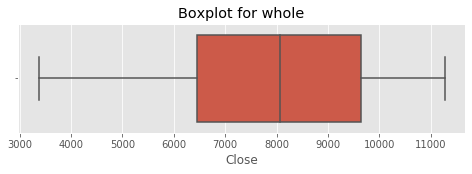

In [6]:
# Box plot for whole
plt.figure(figsize=(8,2))    
sns.boxplot(TXF.loc[:, 'Close'])
plt.title('Boxplot for whole')
plt.show()

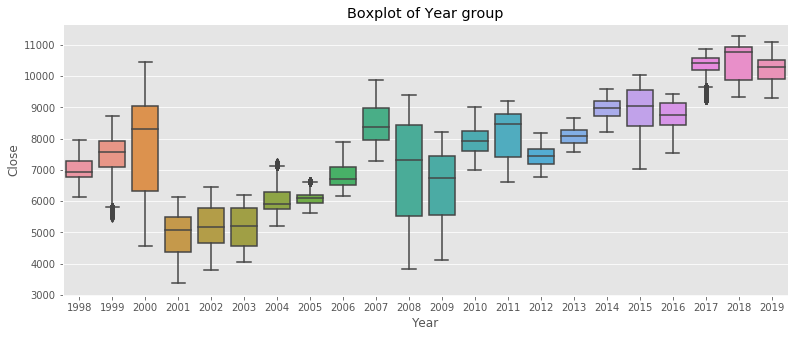

In [9]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(13,5))
sns.boxplot(x='Year', y='Close', data=TXF)
plt.title('Boxplot of Year group')
plt.show()

Text(0.5, 1.0, 'TXF Return')

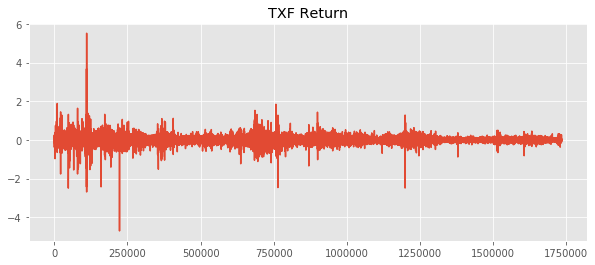

In [11]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(TXF.Return)
plt.title('TXF Return')

In [14]:
# Split time
time = TXF['Time'].str.split(':', 2, expand = True)
TXF['Hour'] = time[0].astype(int)
TXF.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,Range,Diff,Rotate,Up_down,Return,P_Return,Min,Hour
0,1998-07-22,09:01:00,7950.0,7950.0,7950.0,7950.0,9,1998,7,0.0,0.0,NaN,-1,0.000000,0.000000,1,9
1,1998-07-22,09:03:00,7950.0,7950.0,7945.0,7950.0,5,1998,7,5.0,0.0,inf,-1,0.000000,0.062933,3,9
2,1998-07-22,09:05:00,7945.0,7950.0,7945.0,7950.0,13,1998,7,5.0,5.0,1.0,1,0.062933,0.062933,5,9
3,1998-07-22,09:06:00,7950.0,7950.0,7950.0,7950.0,5,1998,7,0.0,0.0,NaN,-1,0.000000,0.000000,6,9
4,1998-07-22,09:07:00,7935.0,7950.0,7935.0,7950.0,7,1998,7,15.0,15.0,1.0,1,0.189036,0.189036,7,9


In [16]:
# from min k to hour k
import os
import pandas as pd
import datetime

stock = TXF.set_index('Date')
period_stock_data = pd.DataFrame()
period_stock_data['open_hour'] = stock.groupby([stock.index,'Hour'])['Open'].first()
period_stock_data['close_hour'] = stock.groupby([stock.index,'Hour'])['Close'].first()
period_stock_data['high_hour'] = stock.groupby([stock.index,'Hour'])['High'].max()
period_stock_data['low_hour'] = stock.groupby([stock.index,'Hour'])['Low'].min()
period_stock_data['range_hour'] = period_stock_data['high_hour'] - period_stock_data['low_hour']
period_stock_data['diff_hour'] = period_stock_data['close_hour'] - period_stock_data['open_hour']
period_stock_data['rotate_hour'] = abs(period_stock_data['range_hour']) / period_stock_data['diff_hour']
period_stock_data['up_down_hour'] = period_stock_data['diff_hour'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_hour'] = ((period_stock_data['close_hour'] -  \
                                     period_stock_data['open_hour']) / period_stock_data['open_hour']) *100
period_stock_data['P_return_hour'] = ((period_stock_data['high_hour'] -  \
                                     period_stock_data['low_hour']) / period_stock_data['low_hour']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data['Year'] = period_stock_data['Date'].map(lambda x: x.year)
period_stock_data.head()

,Date,Hour,open_hour,close_hour,high_hour,low_hour,range_hour,diff_hour,rotate_hour,up_down_hour,return_hour,P_return_hour,Year
0,1998-07-22,9,7950.0,7950.0,7950.0,7850.0,100.0,0.0,inf,-1,0.000000,1.273885,1998
1,1998-07-22,10,7875.0,7880.0,7880.0,7835.0,45.0,5.0,9.000000,1,0.063492,0.574346,1998
2,1998-07-22,11,7848.0,7845.0,7869.0,7820.0,49.0,-3.0,-16.333333,-1,-0.038226,0.626598,1998
3,1998-07-22,12,7865.0,7860.0,7870.0,7860.0,10.0,-5.0,-2.000000,-1,-0.063573,0.127226,1998
4,1998-07-23,9,7830.0,7830.0,7859.0,7820.0,39.0,0.0,inf,-1,0.000000,0.498721,1998


Text(0.5, 1.0, 'TXF hour_return scatter plots')

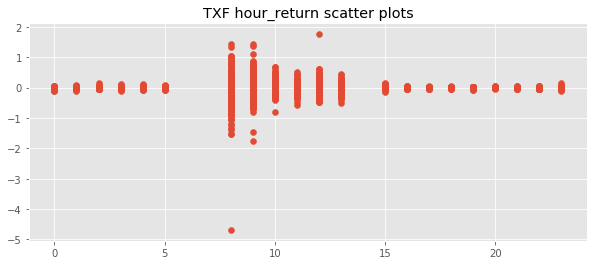

In [17]:
# Stock distribution_day_chage
plt.figure(figsize = (10,4))
plt.scatter(period_stock_data.Hour, period_stock_data.return_hour)
plt.title('TXF hour_return scatter plots')

Text(0.5, 1.0, 'N50 hour_return_Positive scatter plots')

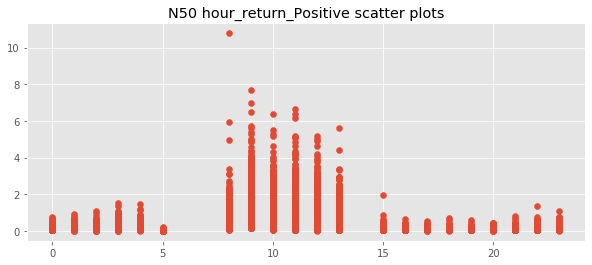

In [18]:
# Stock distribution_day_chage
fig, ax = plt.subplots(figsize = (10,4))
plt.scatter(period_stock_data.Hour, period_stock_data.P_return_hour)
plt.title('N50 hour_return_Positive scatter plots')

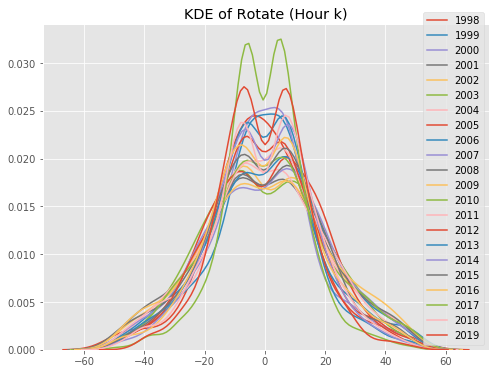

In [19]:
# KDE of Rotate (Hour k)
period_stock_data['rotate_hour'] = period_stock_data['rotate_hour'].replace([np.inf, -np.inf], np.nan)
period_stock_data['rotate_hour'].dropna(how='any',inplace=True)

Year_sorted = np.sort(TXF.Year.unique())
plt.figure(figsize=(8,6))
for i in range(len(Year_sorted)):
    sns.kdeplot(period_stock_data.loc[(period_stock_data['Year'] == Year_sorted[i]) & \
                                      (-50 <= period_stock_data['rotate_hour']) & \
                                      (50 >= period_stock_data['rotate_hour']) \
                                      ,'rotate_hour'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Hour k)')
plt.legend()
plt.show()